# Dataset Exploration Analysis

In [ ]:
import os
import pandas as pd

# Directory containing your CSV data files
dataset_directory = 'C:\\Users\\Administrator\\Downloads\\Dataset\\Dataset\\5%\\All features'

# List all data files, ignoring the header file and any non-CSV files
data_files = [f for f in os.listdir(dataset_directory) if f.endswith('.csv')]

# Initialize an empty DataFrame
full_data = pd.DataFrame()

# Load and concatenate all CSV files directly into the full_data DataFrame
for file in data_files:
    file_path = os.path.join(dataset_directory, file)
    df = pd.read_csv(file_path)  # Assume 'headers' is defined elsewhere
    full_data = pd.concat([full_data, df], ignore_index=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10056\2747931859.py:16: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Assume 'headers' is defined elsewhere
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10056\2747931859.py:16: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Assume 'headers' is defined elsewhere
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10056\2747931859.py:16: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Assume 'headers' is defined elsewhere
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10056\2747931859.py:16: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Assume 'headers' is defined elsewhere


## Imputation

In [ ]:
import pandas as pd

# Helper function to convert hex to decimal and handle errors
def convert_hex(value):
    try:
        return int(value, 16)
    except ValueError:
        return None

# Convert and clean 'sport' and 'dport'
full_data['sport'] = pd.to_numeric(full_data['sport'], errors='coerce').fillna(
    full_data['sport'].apply(lambda x: convert_hex(x) if isinstance(x, str) and 'x' in x else x)
)

full_data['dport'] = pd.to_numeric(full_data['dport'], errors='coerce').fillna(
    full_data['dport'].apply(lambda x: convert_hex(x) if isinstance(x, str) and 'x' in x else x)
)

# Fill remaining NaNs with the mode (most common value) of the column
sport_mode = full_data['sport'].mode(dropna=True)[0]
dport_mode = full_data['dport'].mode(dropna=True)[0]

full_data['sport'] = full_data['sport'].fillna(sport_mode)
full_data['dport'] = full_data['dport'].fillna(dport_mode)

In [ ]:
import numpy as np
# List of numeric features to check for outliers mandatory
numeric_features = full_data.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
# Assuming 'full_data' is your DataFrame and it has been defined in your environment
categorical_columns = full_data.select_dtypes(include=['object']).columns
unique_counts = {col: full_data[col].nunique() for col in categorical_columns}
print(unique_counts)

{'flgs': 9, 'proto': 5, 'saddr': 21, 'daddr': 84, 'state': 11, 'category': 5, 'subcategory': 8}


In [ ]:
import pandas as pd
import ipaddress

# Function to determine if an IP address is private
def check_private(ip):
    try:
        return ipaddress.ip_address(ip).is_private
    except ValueError:  # Handles cases where the IP address might be malformed
        return False

# Apply the function to the 'saddr' and 'daddr' columns
full_data['saddr_private'] = full_data['saddr'].apply(check_private)
full_data['daddr_private'] = full_data['daddr'].apply(check_private)

             saddr  saddr_private            daddr  daddr_private
0  192.168.100.147           True    192.168.100.7           True
1    192.168.100.7           True  192.168.100.147           True
2  192.168.100.147           True    192.168.100.7           True
3  192.168.100.147           True    192.168.100.7           True
4  192.168.100.147           True    192.168.100.7           True


In [ ]:
import ipaddress

def ip_class(ip):
    try:
        first_octet = int(ip.split('.')[0])
        if first_octet <= 127:
            return 'A'
        elif first_octet <= 191:
            return 'B'
        elif first_octet <= 223:
            return 'C'
        elif first_octet <= 239:
            return 'D'
        else:
            return 'E'
    except ValueError:
        return 'Unknown'  # Handles non-standard IP values

# Applying the function to your DataFrame
full_data['saddr_class'] = full_data['saddr'].apply(ip_class)
full_data['daddr_class'] = full_data['daddr'].apply(ip_class)

In [ ]:
# Drop saddr and daddr becasue feature extracted
full_data.drop(['saddr', 'daddr'], axis=1, inplace=True)

In [ ]:
full_data['dport'] = pd.to_numeric(full_data['dport'], errors='coerce').fillna(0).astype(int)

In [ ]:
categorical_columns = full_data.select_dtypes(include=['object']).columns

{'flgs': 9, 'proto': 5, 'state': 11, 'category': 5, 'subcategory': 8, 'saddr_class': 2, 'daddr_class': 6}
Unique labels for flgs: ['e' 'e s' 'e d' 'e *' 'e g' 'eU' 'e &' 'e   t' 'e  D']
Unique labels for proto: ['tcp' 'arp' 'udp' 'icmp' 'ipv6-icmp']
Unique labels for state: ['RST' 'CON' 'REQ' 'INT' 'URP' 'FIN' 'ACC' 'NRS' 'ECO' 'TST' 'MAS']
Unique labels for category: ['DoS' 'DDoS' 'Normal' 'Reconnaissance' 'Theft']
Unique labels for subcategory: ['HTTP' 'TCP' 'UDP' 'Normal' 'OS_Fingerprint' 'Service_Scan'
 'Data_Exfiltration' 'Keylogging']
Unique labels for saddr_class: ['C' 'Unknown']
Unique labels for daddr_class: ['C' 'A' 'Unknown' 'E' 'B' 'D']


In [ ]:
full_data["category"] =full_data['category'].astype(str) + '-' + full_data['subcategory'].astype(str)
full_data.drop('subcategory', axis=1, inplace=True)

In [ ]:
full_data["category"] = full_data["category"].str.lower()
full_data['category'] = full_data['category'].str.replace(r'^theft.*', 'theft', regex=True)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,sport,dport,pkts,bytes,...,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,saddr_private,daddr_private,saddr_class,daddr_class
0,1,1.528089e+09,e,1,tcp,1,49960.0,80,8,1980,...,1.133720,1.129970,770,602,1,dos-http,True,True,C,C
1,2,1.528089e+09,e,1,arp,2,-1.0,-1,2,120,...,0.005142,0.005142,2,6,1,dos-http,True,True,C,C
2,3,1.528089e+09,e,1,tcp,1,49962.0,80,8,2126,...,1.135100,1.129970,770,602,1,dos-http,True,True,C,C
3,4,1.528089e+09,e,1,tcp,1,49964.0,80,8,2024,...,1.135140,1.129970,770,602,1,dos-http,True,True,C,C
4,5,1.528089e+09,e,1,tcp,1,49966.0,80,8,2319,...,1.135260,1.129970,770,602,1,dos-http,True,True,C,C


## HOT ENCODING

In [ ]:
import pandas as pd

def process_data(dataframe, columns):
    for col in columns:
        dummies = pd.get_dummies(dataframe[col], prefix=col, drop_first=True, dtype='uint8')
        dataframe = pd.concat([dataframe.drop(col, axis=1), dummies], axis=1)
    return dataframe


one_hot_cols = ['proto', 'state', 'saddr_class', 'daddr_class']

# Process the DataFrame in memory
processed_data = process_data(full_data, one_hot_cols)


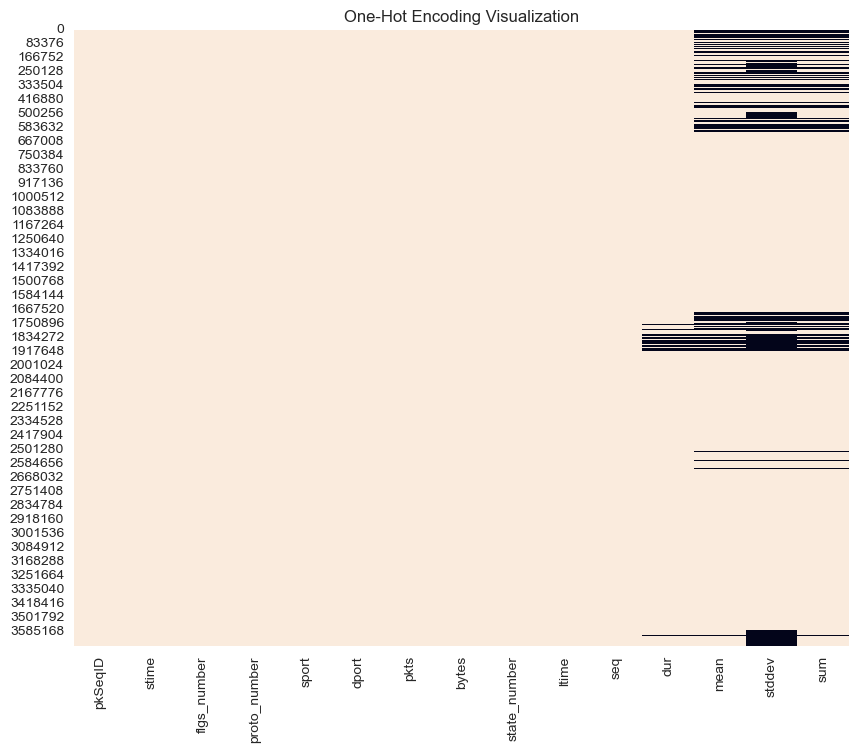

In [ ]:
# Identify categorical columns that need encoding, excluding the 'category' column
categorical_columns = processed_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('category')  # Remove 'category' from the list if it's present

# Apply one-hot encoding to the remaining categorical columns
processed_data_encoded = pd.get_dummies(processed_data, columns=categorical_columns)

In [ ]:
# Cell 1
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
# Cell 2: Standardizing Numeric Features
# Select only numeric features for standardization
numeric_features = processed_data.select_dtypes(include=[np.number]).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
standardized_data = scaler.fit_transform(processed_data[numeric_features])
standardized_df = pd.DataFrame(standardized_data, columns=numeric_features)

In [ ]:
# Cell 3: Plotting function for feature distributions
def plot_feature_distributions(df_original, df_standardized, feature_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Original data histogram
    ax[0].hist(df_original[feature_name], bins=30, color='blue', alpha=0.7, label='Original')
    ax[0].set_title(f'{feature_name} Before Standardization')
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    
    # Standardized data histogram
    ax[1].hist(df_standardized[feature_name], bins=30, color='green', alpha=0.7, label='Standardized')
    ax[1].set_title(f'{feature_name} After Standardization')
    ax[1].set_xlabel('Standardized Value')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Generate plots for each numeric feature
for feature in numeric_features:
    plot_feature_distributions(processed_data, standardized_df, feature)


In [ ]:
# Cell 4: Splitting data and encoding target variable
# Assuming `processed_data_encoded` is already preprocessed to include encoded features
X = processed_data_encoded.drop('category', axis=1)
y = processed_data_encoded['category']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Count original class distribution before SMOTE
original_class_distribution = Counter(y_train_ml)
print("Class distribution before SMOTE:", original_class_distribution)


In [ ]:
# Cell 5: Applying SMOTE to balance classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_ml, y_train_ml)

# Count class distribution after SMOTE
new_class_distribution = Counter(y_train_smote)
print("Class distribution after SMOTE:", new_class_distribution)


In [ ]:
# Cell 6: Visualizing class distributions before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot class distribution before SMOTE
ax[0].bar(original_class_distribution.keys(), original_class_distribution.values(), color='skyblue')
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Number of Samples')

# Plot class distribution after SMOTE
ax[1].bar(new_class_distribution.keys(), new_class_distribution.values(), color='lightgreen')
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import time

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Measure training time
start_time = time.time()
rf.fit(X_train_smote, y_train_smote)
training_time = time.time() - start_time

print(f"Training Time: {training_time:.2f} seconds")

CPU times: total: 10min 3s
Wall time: 10min 4s


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_ml)
y_proba_rf = rf.predict_proba(X_test_ml)

# Calculate metrics
rf_accuracy = accuracy_score(y_test_ml, y_pred_rf)
print("Accuracy:", rf_accuracy)

rf_precision = precision_score(y_test_ml, y_pred_rf, average='weighted')
print("Precision:", rf_precision)

rf_recall = recall_score(y_test_ml, y_pred_rf, average='weighted')
print("Recall:", rf_recall)

rf_f1 = f1_score(y_test_ml, y_pred_rf, average='weighted')
print("F1 Score:", rf_f1)

rf_auc_roc = roc_auc_score(y_test_ml, y_proba_rf, multi_class='ovr', average='weighted')
print("AUC ROC:", rf_auc_roc)

# Confusion Matrix and False Alarm Rate calculation
rf_cm = confusion_matrix(y_test_ml, y_pred_rf)
print("Confusion Matrix:\n", rf_cm)

# Calculate False Positives (FP) and True Negatives (TN) for each class
fp = rf_cm.sum(axis=0) - np.diag(cm)  # False Positives for each class
tn = rf_cm.sum() - (rf_cm.sum(axis=0) + rf_cm.sum(axis=1) - np.diag(rf_cm))  # True Negatives for each class

# False Alarm Rate calculation, averaged across all classes
rf_false_alarm_rate = np.mean(fp / (fp + tn))
print("False Alarm Rate:", false_alarm_rate if not np.isnan(false_alarm_rate) else None)

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store the metrics for easy plotting
metrics = {
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1 Score": rf_f1,
    "AUC ROC": auc_roc,
    "False Alarm Rate": false_alarm_rate
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.ylim(0, 1)  # Set the y-axis range to 0-1 for better comparison
plt.show()

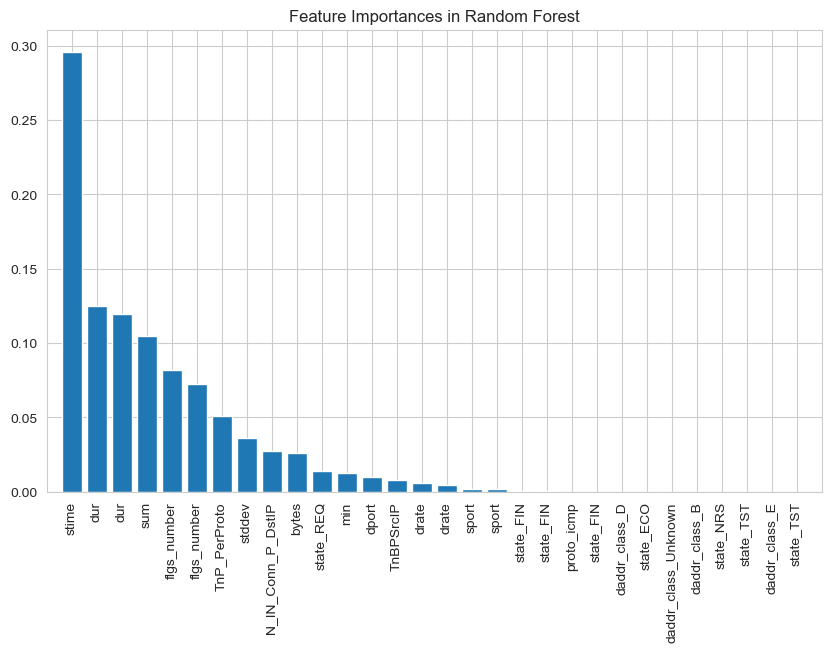

In [114]:
rf_importances = rf.feature_importances_

# Plotting function
def plot_importances(importances, title, feature_names):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

plot_importances(rf_importances, 'Feature Importances in Random Forest', features)


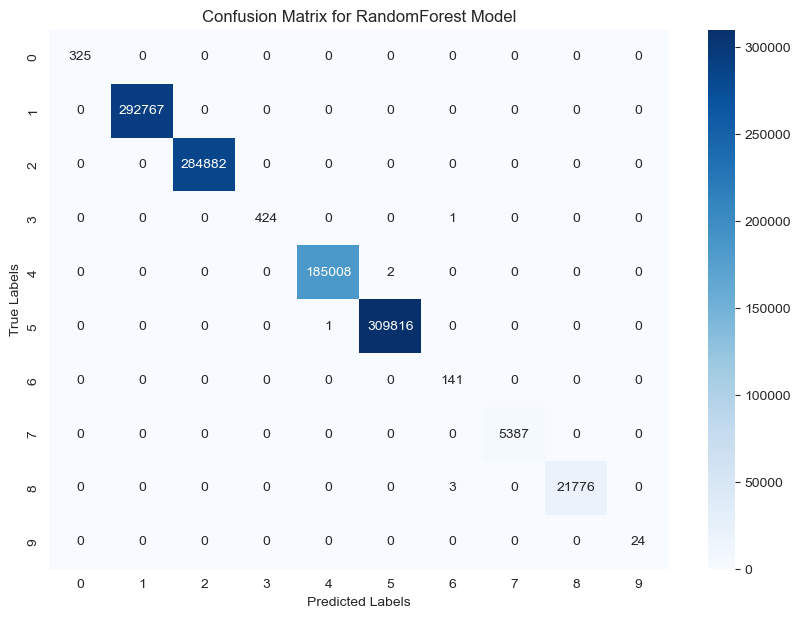

In [ ]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

y_smote_categorical_ = to_categorical(y_train_smote)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_smote.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
%%time
# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=4096, callbacks=[early_stopping])


Epoch 1/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.2386 - loss: 26574954.0000 - val_accuracy: 0.1002 - val_loss: 2.4658
Epoch 2/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.2809 - loss: 15776.8281 - val_accuracy: 0.1002 - val_loss: 2.7410
Epoch 3/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.2814 - loss: 5150.7783 - val_accuracy: 0.1002 - val_loss: 3.0011
Epoch 4/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.2816 - loss: 2420.4263 - val_accuracy: 0.1002 - val_loss: 3.2228
Epoch 5/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.2814 - loss: 1381.6357 - val_accuracy: 0.1002 - val_loss: 3.4095
Epoch 6/20
627/627 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.2814 - loss: 922.7561 - val_accuracy: 0.1002 - val_loss: 3.5707
CPU times: total: 30.6 s
Wall time: 1min 59s


In [146]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, classes):
        self.model = model
        self.classes_ = classes  # Storing the classes recognized by the model

    def fit(self, X, y):
        # This method is intentionally left to do nothing since training is handled by TensorFlow
        return self

    def predict(self, X):
        # Predicts the class indices with the highest probability
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        # Optionally, implement this method if you need probability predictions
        return self.model.predict(X)

# Determine classes from y_train assuming y_train is one-hot encoded
classes = np.unique(np.argmax(y_train, axis=1))

# Create an instance of the wrapper with the classes
wrapped_model = KerasClassifierWrapper(model, classes)

# Now use this wrapped model in permutation_importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(wrapped_model, X_train, np.argmax(y_train, axis=1), scoring='accuracy')


80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 99s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 97s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 93s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 97s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 93s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 100s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step
80249/80249 ━━━━━━━━━━━━━━━━━━━━ 

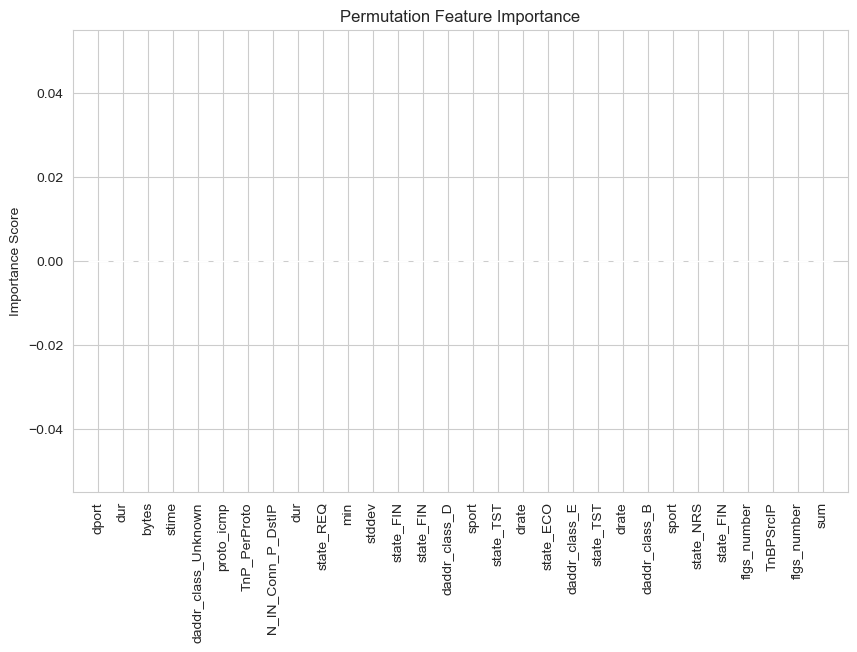

In [147]:
import matplotlib.pyplot as plt
import numpy as np

def plot_importances(importances, feature_names, title):
    # importances should be the array of importance values for each feature
    # feature_names should be a list of feature names
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align="center", color='skyblue')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.ylabel('Importance Score')
    plt.show()

# Example feature names, adjust this list to match your dataset's features
feature_names = [
    'sum', 'bytes', 'stime', 'daddr_class_Unknown', 'proto_icmp', 'TnP_PerProto', 'N_IN_Conn_P_DstIP',
    'dur', 'state_REQ', 'min', 'stddev', 'state_FIN', 'state_FIN', 'daddr_class_D', 'sport',
    'state_TST', 'drate', 'state_ECO', 'daddr_class_E', 'state_TST', 'drate', 'daddr_class_B',
    'sport', 'state_NRS', 'state_FIN', 'flgs_number', 'TnBPSrcIP', 'flgs_number', 'dur', 'dport'
]


# Visualizing the permutation importance
plot_importances(perm_importance.importances_mean, feature_names, 'Permutation Feature Importance')

48421/48421 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step


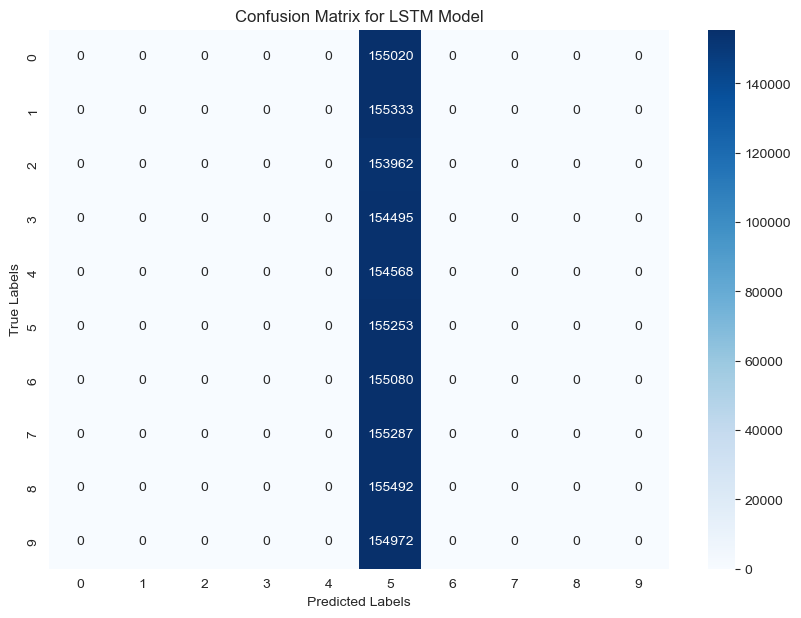

Unique classes in y_true_labels: [0 1 2 3 4 5 6 7 8 9]
Shape of model predictions (y_pred_lstm): (1549462, 10)
Recall: 0.10019800421049371, F1-Score: 0.018250605817033087, ROC AUC: 0.5


In [172]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model  # Assuming you are loading a model


# Assuming X_val and y_val are your validation datasets
y_pred_lstm = model.predict(X_val)
y_pred_labels = np.argmax(y_pred_lstm, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Generate the confusion matrix
cm_lstm = confusion_matrix(y_true_labels, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Function to calculate various metrics
def get_metrics(y_true, y_pred, proba):
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Handle classes for ROC AUC
    unique_classes = np.unique(np.concatenate([y_true, y_pred]))
    roc_auc = roc_auc_score(y_true, proba, multi_class='ovr', average='weighted', labels=unique_classes)

    print(f"Recall: {recall}, F1-Score: {f1}, ROC AUC: {roc_auc}")

# Checking unique classes and the shape of model predictions
unique_classes = np.unique(y_true_labels)
num_classes = len(unique_classes)
print(f"Unique classes in y_true_labels: {unique_classes}")
print(f"Shape of model predictions (y_pred_lstm): {y_pred_lstm.shape}")

# Ensure the model's output layer and the ROC AUC calculation handle all classes
if y_pred_lstm.shape[1] == num_classes:
    get_metrics(y_true_labels, y_pred_labels, y_pred_lstm)
else:
    print("The number of output classes in the model does not match the number of classes in y_true_labels.")


## RNN (Recurrent Neural Network)

In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


X = processed_data[features]
y = processed_data['category']

# Encode categorical data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Handling class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_reshaped.reshape((-1, X_train_scaled.shape[1])), y_train)
X_train_balanced = X_train_balanced.reshape((-1, 1, X_train_scaled.shape[1]))

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(1, X_train_scaled.shape[1]), return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [175]:
%%time

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_balanced, y_train_balanced, epochs=20, batch_size=4096, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.7907 - loss: 0.6941 - val_accuracy: 0.9897 - val_loss: 0.0311
Epoch 2/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.9935 - loss: 0.0241 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 3/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 4/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9998 - val_loss: 8.1105e-04
Epoch 5/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9999 - val_loss: 6.2037e-04
Epoch 6/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 4.6553e-04
Epoch 7/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.9998 - loss: 8.2566e-04 - val_accuracy: 0.9999 - val_loss: 4.1565e-04
Epoch 8/20
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step 

In [196]:
from tensorflow.keras.utils import to_categorical

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_labels, num_classes=10)

# Now, use y_train_one_hot to fit your model
wrapped_model.fit(X_train_reshaped, y_train_one_hot)


KerasClassifier(
	model=<function build_model at 0x0000018A95475BC0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [200]:
def build_model():
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Then continue with the existing code
wrapped_model = KerasClassifier(model=build_model, epochs=1, batch_size=32, verbose=0)
wrapped_model.fit(X_train_reshaped, y_train_labels)  # Use integer labels directly here


KerasClassifier(
	model=<function build_model at 0x0000018A954756C0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [214]:
from sklearn.metrics import accuracy_score

# Baseline accuracy calculation
baseline_score = accuracy_score(y_train_labels, predictions)

importances = []
# Assuming X_train_reshaped is (samples, 1, features) and checking the dimension
if X_train_reshaped.ndim == 3 and X_train_reshaped.shape[1] == 1:
    feature_axis = 2  # where features are aligned along the third dimension
    for i in range(X_train_reshaped.shape[feature_axis]):
        X_temp = X_train_reshaped.copy()
        np.random.shuffle(X_temp[:, 0, i])  # Shuffle along each feature correctly
        shuffled_predictions = wrapped_model.predict(X_temp)
        temp_score = accuracy_score(y_train_labels, shuffled_predictions)
        importances.append(baseline_score - temp_score)
else:
    print("Unexpected shape of X_train_reshaped")

print("Feature importances:", importances)


Feature importances: [0.21286620627857256, 0.008777334966909023, 0.5740283589478371, 0.004017241045525366, 0.008532713459575958, 0.14966425041277287, 0.12943105102895913, 0.07614670652886368, 0.0016842792308181531, 0.0011944830866836842, 0.003991520525251757, 0.027580694675299222, 0.027043882526363583, 0.009262291228196329, 0.014290238094579633, 6.098252387443104e-05, 0.005513041410037611, 0.0003022852543981269, 0.0002594177206087789, 5.628092339438062e-05, 0.005906593026696827, 0.0033998102765924187, 0.015397326725279936, 0.0015827799733945103, 0.02729251422234147, 0.014745740211682623, 0.02102763158258636, 0.012578578955083075, 0.05672162929816171, 0.027581109522400338]


In [212]:
predictions = wrapped_model.predict(X_train_reshaped)
print(predictions.shape)


(7231580,)


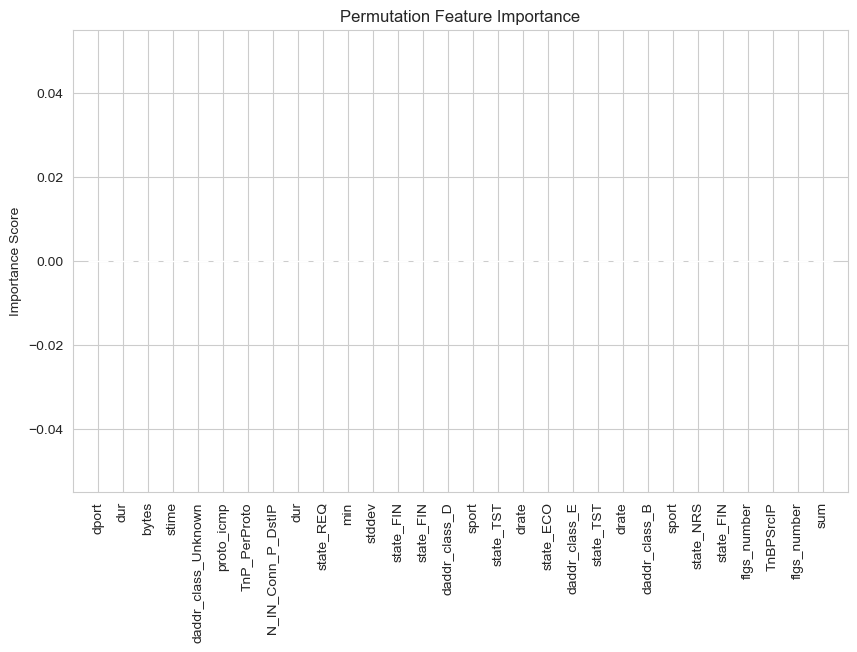

In [216]:
import matplotlib.pyplot as plt
import numpy as np

def plot_importances(importances, feature_names, title):
    # importances should be the array of importance values for each feature
    # feature_names should be a list of feature names
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align="center", color='skyblue')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.ylabel('Importance Score')
    plt.show()

# Example feature names, adjust this list to match your dataset's features
feature_names = [
    'sum', 'bytes', 'stime', 'daddr_class_Unknown', 'proto_icmp', 'TnP_PerProto', 'N_IN_Conn_P_DstIP',
    'dur', 'state_REQ', 'min', 'stddev', 'state_FIN', 'state_FIN', 'daddr_class_D', 'sport',
    'state_TST', 'drate', 'state_ECO', 'daddr_class_E', 'state_TST', 'drate', 'daddr_class_B',
    'sport', 'state_NRS', 'state_FIN', 'flgs_number', 'TnBPSrcIP', 'flgs_number', 'dur', 'dport'
]


# Visualizing the permutation importance
plot_importances(perm_importance.importances_mean, feature_names, 'Permutation Feature Importance')

34393/34393 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.9999 - loss: 4.7792e-04
Loss: 0.00040842065936885774, Accuracy: 0.9999482035636902


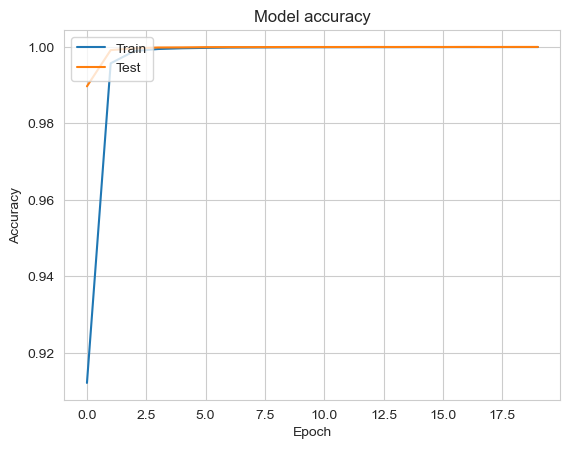

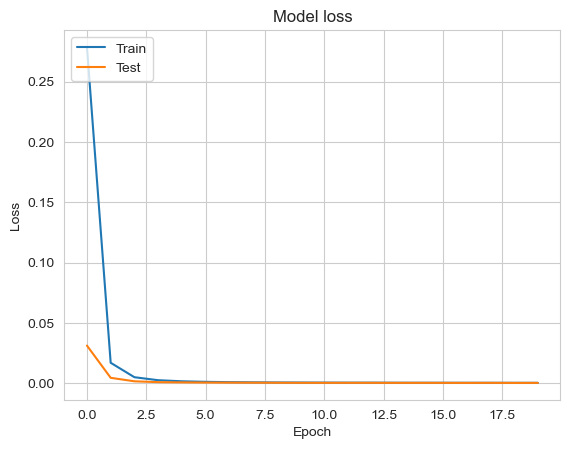

In [227]:

# Evaluate the model
evaluation = model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


34393/34393 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step


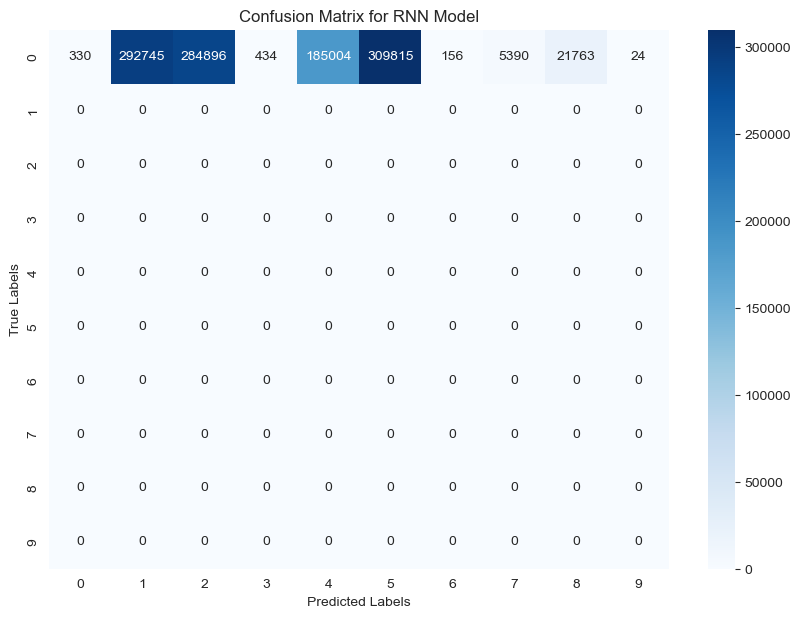

Recall: 0.00029984816779140015, F1-Score: 1.797639455660064e-07, ROC AUC: 1.0
All Metrics ANN: None


In [230]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_rnn is predicted from the model
y_pred_rnn = model.predict(X_test_reshaped)

# Check if y_pred_rnn is 2D and convert if necessary
if y_pred_rnn.ndim == 1:
    y_pred_rnn = np.expand_dims(y_pred_rnn, axis=-1)

if y_test.ndim == 1:
    y_test = np.expand_dims(y_test, axis=-1)

# If it's a multiclass classification with one-hot encoded labels
if y_pred_rnn.shape[1] > 1:
    y_pred_rnn_labels = np.argmax(y_pred_rnn, axis=1)
    y_test_rnn_labels = np.argmax(y_test, axis=1)
else:
    # For binary classification with a single sigmoid output
    y_pred_rnn_labels = (y_pred_rnn > 0.5).astype(int)
    y_test_rnn_labels = y_test.astype(int)  # Ensure y_test is also suitable for comparison

# Generate the confusion matrix
cm_rnn = confusion_matrix(y_test_rnn_labels, y_pred_rnn_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Assuming get_metrics is defined somewhere that can handle these label formats
print("All Metrics ANN:", get_metrics(y_pred_rnn_labels, y_test_rnn_labels, y_pred_rnn))


XGBOOST Multi class Classification

In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

X = processed_data[features]
y = processed_data['category'] 

y_encoded = label_encoder.fit_transform(y)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)





In [233]:
%%time
# Train the XGBoost model
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predicting the test set results
y_pred = xgb_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: {conf_matrix}')

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:37:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9999936395843195
Confusion Matrix: [[   325      0      0      0      0      0      0      0      0      0]
 [     0 292767      0      0      0      0      0      0      0      0]
 [     0      0 284882      0      0      0      0      0      0      0]
 [     0      0      0    425      0      0      0      0      0      0]
 [     0      0      0      0 185010      0      0      0      0      0]
 [     0      0      0      0      1 309816      0      0      0      0]
 [     0      0      0      0      0      0    140      0      1      0]
 [     0      0      0      0      0      0      0   5387      0      0]
 [     0      0      0      0      0      0      5      0  21774      0]
 [     0      0      0      0      0      0      0      0      0     24]]
CPU times: total: 1h 41min 2s
Wall time: 12min 45s


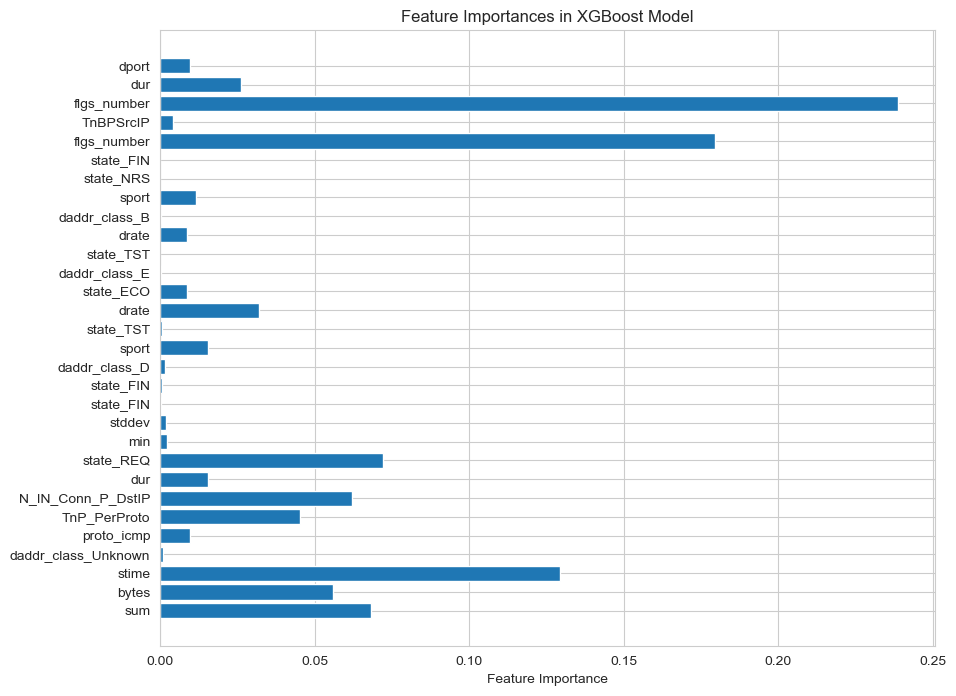

In [234]:

feature_importances = xgb_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), feature_importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances in XGBoost Model')
plt.show()

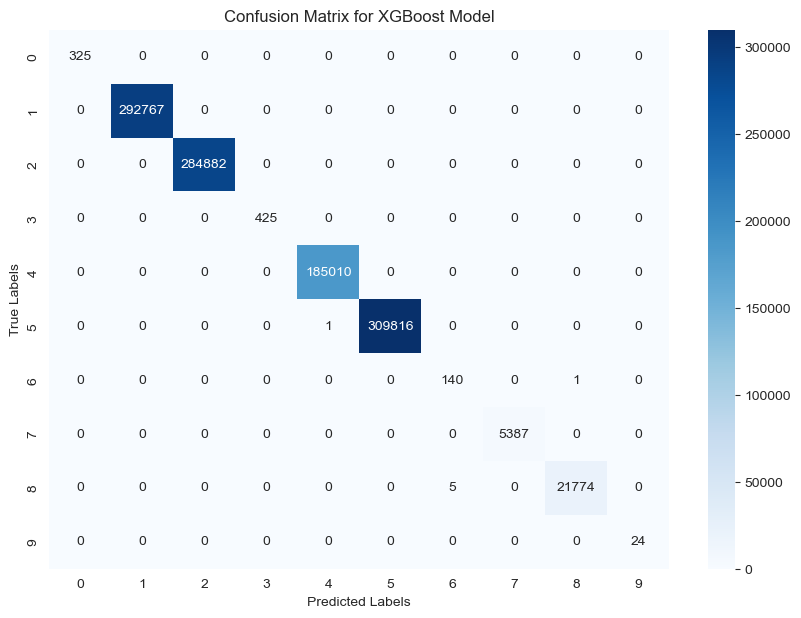

In [261]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [262]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

def get_metrics_with_proba(y_true, y_pred, proba, threshold=0.5):
    # Convert probabilities to binary predictions based on the threshold
    y_pred_thresholded = (proba >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_thresholded)
    precision = precision_score(y_true, y_pred_thresholded, average='macro')
    recall = recall_score(y_true, y_pred_thresholded, average='macro')
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }


# Binarize the labels for a multi-class setting
classes = np.unique(y_test)
y_true_binarized = label_binarize(y_test, classes=classes)

# Calculate ROC AUC using One-vs-Rest approach
roc_auc_ovr = roc_auc_score(y_true_binarized, y_proba_xgb, multi_class='ovr', average='macro')
print("ROC AUC (One-vs-Rest, Macro-average):", roc_auc_ovr)

# If class imbalance is a concern, consider using a weighted average:
roc_auc_ovr_weighted = roc_auc_score(y_true_binarized, y_proba_xgb, multi_class='ovr', average='weighted')
print("ROC AUC (One-vs-Rest, Weighted-average):", roc_auc_ovr_weighted)

# Example usage:
threshold = 0.95  # Set a high threshold to test model confidence
metrics = get_metrics_with_proba(y_test, y_pred_xgb, max_proba_xgb, threshold)
print("Metrics at threshold {}:".format(threshold), metrics)


ROC AUC (One-vs-Rest, Macro-average): 0.9999999796005659
ROC AUC (One-vs-Rest, Weighted-average): 0.9999999998867406


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics at threshold 0.95: {'Accuracy': 0.26601711678722684, 'Precision': 0.02660214676626635, 'Recall': 0.1}


AUTOML


In [267]:
from supervised.automl import AutoML  # Import MLjar's AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Check if there are any NaN values in the processed data
if processed_data.isna().any().any():
    print("There are NaN values in the processed data.")
else:
    print("No NaN values in the processed data.")

# Function to ensure target variable is binary (0 or 1)
def convert_to_binary(target):
    if target.dtype == 'object':
        return target.apply(lambda x: 1 if x.lower() == 'attack' else 0 if x.lower() == 'normal' else None).dropna().astype(int)
    return target.astype(int)

# ------ FOR CATEGORY TARGET ------

# Prepare the feature matrix and target vector for category target
X_category = processed_data[features]
X_category = X_category.loc[:, X_category.notna().any()]  # Remove columns that are entirely NaN
X_category.fillna(0, inplace=True)  # Fill remaining NaNs with 0

# Encode the target variable for 'category'
label_encoder_cat = LabelEncoder()
y_category = processed_data['category'].astype(str)  # Convert to string to ensure consistency
y_category = label_encoder_cat.fit_transform(y_category)  # Encode target

# Convert to numpy arrays
X_category = X_category.to_numpy()
y_category = np.array(y_category)

# Split the data into train and test sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_category, y_category, test_size=0.3, random_state=42)

# Initialize and Train AutoML Model for 'category' target
automl_category = AutoML(mode="Explain")
automl_category.fit(X_train_cat, y_train_cat)

# Switch to Perform mode
automl_category = AutoML(mode="Perform")
automl_category.fit(X_train_cat, y_train_cat)

# Switch to Compete mode
automl_category = AutoML(mode="Compete")  # Options: 'Explain', 'Perform', 'Compete'
automl_category.fit(X_train_cat, y_train_cat)

# Evaluate the AutoML Model for 'category' target
automl_predictions_cat = automl_category.predict(X_test_cat)
automl_accuracy_cat = accuracy_score(y_test_cat, automl_predictions_cat)
print(f"Accuracy of AutoML model (category target): {automl_accuracy_cat}")

# ------ FOR ATTACK TARGET ------

# Prepare the feature matrix and target vector for attack target
X_attack = processed_data[features]
X_attack = X_attack.loc[:, X_attack.notna().any()]  # Remove columns that are entirely NaN
X_attack.fillna(0, inplace=True)  # Fill remaining NaNs with 0

# Ensure the target variable for 'attack' is binary (0 or 1)
y_attack = convert_to_binary(processed_data['attack'])

# Convert to numpy arrays
X_attack = X_attack.to_numpy()
y_attack = np.array(y_attack)

# Split the data into train and test sets
X_train_att, X_test_att, y_train_att, y_test_att = train_test_split(X_attack, y_attack, test_size=0.3, random_state=42)

# Initialize and Train AutoML Model for 'attack' target
automl_attack = AutoML(mode="Explain")
automl_attack.fit(X_train_att, y_train_att)

# Switch to Perform mode
automl_attack = AutoML(mode="Perform")
automl_attack.fit(X_train_att, y_train_att)

# Switch to Compete mode
automl_attack = AutoML(mode="Compete")  # Options: 'Explain', 'Perform', 'Compete'
automl_attack.fit(X_train_att, y_train_att)

# Evaluate the AutoML Model for 'attack' target
automl_predictions_att = automl_attack.predict(X_test_att)
automl_accuracy_att = accuracy_score(y_test_att, automl_predictions_att)
print(f"Accuracy of AutoML model (attack target): {automl_accuracy_att}")

No NaN values in the processed data.
Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 1.469446 trained in 60.74 seconds
2_DecisionTree logloss 0.09065 trained in 424.05 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 3e-06 trained in 1352.91 seconds
4_Default_NeuralNetwork logloss 0.014278 trained in 1170.14 seconds
5_Default_RandomForest logloss 0.016152 trained in 810.68 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 3e-06 trained in 58.1 seconds
AutoML fit time: 3988.78 seconds
AutoML best model: 3_Default_Xgboost
Linear algorithm was disabled.
AutoML d

In [265]:
pip install mljar-supervised


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   -- ------------------------------------- 6.3/101.7 MB 29.7 MB/s eta 0:00:04
   ---- ----------------------------------- 10.5/101.7 MB 24.3 MB/s eta 0:00:04
   ------ --------------------------------- 15.7/101.7 MB 24.7 MB/s eta 0:00:04
   ------- -------------------------------- 18.9/101.7 MB 22.5 MB/s eta 0:00:04
   ---------- ----------------------------- 26.2/101.7 MB 24.4 MB/s eta 0:00:04
   ------------ --------------------------- 31.5/101.7 MB 24.7 MB/s eta 0:00:03
   ------------ --------------------------- 32.5/101.7 MB 24.6 MB/s eta 0:00:03
   ------------ --------------------------- 32.5/101.7 MB 24.6 MB/s eta 0:00:03
   ------------ --------------------------- 32.5/101.7 MB 24.6 MB/s eta 0:00:03
   ---

In [268]:
print(len(processed_data["category"]))
print(processed_data["category"].shape)

3668522
(3668522,)


In [269]:
from supervised.automl import AutoML  # Import MLjar's AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Ensure correct data types and conversions
def prepare_data_for_automl(df, features, target, is_binary=False):
    # Filter the relevant feature columns
    X = df[features].copy()
    
    # Handle missing data
    X.fillna(0, inplace=True)  # Filling NaN with 0

    # Encode the target variable
    if is_binary:
        # Convert target to binary (0 and 1)
        target = LabelEncoder().fit_transform(df[target].astype(str))  # Ensuring string type for encoding
    else:
        # Multi-class target encoding
        target = LabelEncoder().fit_transform(df[target].astype(str))

    return X, target

# ------ FOR CATEGORY TARGET (Multi-Class) ------
features = [
    'sum', 'bytes', 'stime', 'daddr_class_Unknown', 'proto_icmp', 'TnP_PerProto', 'N_IN_Conn_P_DstIP',
    'dur', 'state_REQ', 'min', 'stddev', 'state_FIN', 'sport', 'drate', 'daddr_class_B'
]

# Prepare the data for multi-class classification (category target)
X_category, y_category = prepare_data_for_automl(processed_data, features, 'category', is_binary=False)

# Split the data for training and testing
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_category, y_category, test_size=0.3, random_state=42)

# Initialize and Train AutoML for 'category' target, using only specific models (Random Forest, XGBoost, ANN, LightGBM)
automl_category = AutoML(
    mode="Compete", 
    algorithms=["Random Forest", "Xgboost", "LightGBM", "Neural Network"],
    total_time_limit=3600
)

automl_category.fit(X_train_cat, y_train_cat)

# Evaluate the AutoML Model for 'category' target
automl_predictions_cat = automl_category.predict(X_test_cat)
automl_accuracy_cat = accuracy_score(y_test_cat, automl_predictions_cat)
print(f"AutoML Accuracy for multi-class (category): {automl_accuracy_cat}")

# ------ FOR ATTACK TARGET (Binary) ------
# Prepare the data for binary classification (attack target)
X_attack, y_attack = prepare_data_for_automl(processed_data, features, 'attack', is_binary=True)

# Split the data for training and testing
X_train_att, X_test_att, y_train_att, y_test_att = train_test_split(X_attack, y_attack, test_size=0.3, random_state=42)

# Initialize and Train AutoML for 'attack' target, using only specific models
automl_attack = AutoML(
    mode="Compete", 
    algorithms=["Random Forest", "Xgboost", "LightGBM", "Neural Network"],
    total_time_limit=3600
)

automl_attack.fit(X_train_att, y_train_att)

# Evaluate the AutoML Model for 'attack' target
automl_predictions_att = automl_attack.predict(X_test_att)
automl_accuracy_att = accuracy_score(y_test_att, automl_predictions_att)
print(f"AutoML Accuracy for binary (attack): {automl_accuracy_att}")

# ------ Model Comparison for 'category' (multi-class) target ------
print("\nModel Comparison for 'category' target:")
print(f"AutoML Accuracy (category): {automl_accuracy_cat}")

# ------ Model Comparison for 'attack' (binary) target ------
print("\nModel Comparison for 'attack' target:")
print(f"AutoML Accuracy (attack): {automl_accuracy_att}")


AutoML directory: AutoML_7
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Random Forest', 'Xgboost', 'LightGBM', 'Neural Network']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.090666 trained in 34.66 seconds
Disable stacking for split validation
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 4 models
2_Default_LightGBM logloss 0.049569 trained in 107.41 seconds
3_Default_Xgboost logloss 6e-06 trained in 735.98 seconds
4_Default_NeuralNetwork logloss 0.01361 trained in 1133.74 seconds
* Step not_so_ra

In [294]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define and train a Random Forest Classifier for multi-class classification
best_rf_multiclass = RandomForestClassifier()
best_rf_multiclass.fit(X_train_cat, y_train_cat)

# Define and train an ANN (Multi-Layer Perceptron) for multi-class classification
model_ann_multiclass = MLPClassifier()
model_ann_multiclass.fit(X_train_cat, y_train_cat)

# Define and train an XGBoost Classifier for multi-class classification
xgb_model_multiclass = XGBClassifier()
xgb_model_multiclass.fit(X_train_cat, y_train_cat)

# Define a function to calculate accuracy
def calculate_accuracy(model, X, y):
    predictions = model.predict(X)
    return accuracy_score(y, predictions)

# Calculate accuracy for each model in the multi-class scenario
manual_rf_multiclass_accuracy = calculate_accuracy(best_rf_multiclass, X_test_cat, y_test_cat)
manual_ann_multiclass_accuracy = calculate_accuracy(model_ann_multiclass, X_test_cat, y_test_cat)
manual_xgb_multiclass_accuracy = calculate_accuracy(xgb_model_multiclass, X_test_cat, y_test_cat)

# Print the accuracy of each multi-class model
print(f"Multi-class Classification Accuracy - Random Forest: {manual_rf_multiclass_accuracy}")
print(f"Multi-class Classification Accuracy - ANN: {manual_ann_multiclass_accuracy}")
print(f"Multi-class Classification Accuracy - XGBoost: {manual_xgb_multiclass_accuracy}")




Multi-class Classification Accuracy - Random Forest: 0.9999954568459426
Multi-class Classification Accuracy - ANN: 0.28150927212311583
Multi-class Classification Accuracy - XGBoost: 1.0


In [284]:
# Binary Classification - AutoML Result for Attack
print("\n--- AutoML Models Performance for Binary Classification (Attack) ---")

# Print AutoML accuracy for binary classification
print(f"AutoML Accuracy for binary (attack): {automl_accuracy_att}")

# Multi-class Classification - AutoML Result for Category
print("\n--- AutoML Models Performance for Multi-Class Classification (Category) ---")

# Print AutoML accuracy for multi-class classification
print(f"AutoML Accuracy for multi-class (category): {automl_accuracy_cat}")

# Now compare these results with your manual models:

print("\n--- Manual vs AutoML Comparison ---")





--- AutoML Models Performance for Binary Classification (Attack) ---
AutoML Accuracy for binary (attack): 0.9998718830555801

--- AutoML Models Performance for Multi-Class Classification (Category) ---
AutoML Accuracy for multi-class (category): 0.999998182738377

--- Manual vs AutoML Comparison ---


In [ ]:
print(automl_accuracy_att)

In [290]:
print("\n--- Multi-Class Classification (Category) Model Comparison ---")

# Compare Manual Random Forest vs AutoML
print("\nManual Random Forest Accuracy (multi-class):", manual_rf_multiclass_accuracy)
print("AutoML Accuracy (multi-class):", automl_accuracy_cat)

if manual_rf_multiclass_accuracy is None or automl_accuracy_cat is None:
    print("Error: One of the accuracy values is None. Please check the manual or AutoML model results.")
else:
    if manual_rf_multiclass_accuracy > automl_accuracy_cat:
        print(f"Manual Random Forest outperformed AutoML by {manual_rf_multiclass_accuracy - automl_accuracy_cat:.4f}")
    elif automl_accuracy_cat > manual_rf_multiclass_accuracy:
        print(f"AutoML outperformed Manual Random Forest by {automl_accuracy_cat - manual_rf_multiclass_accuracy:.4f}")
    else:
        print("Both Manual Random Forest and AutoML have the same accuracy.")


if manual_ann_multiclass_accuracy is None or automl_accuracy_cat is None:
    print("Error: One of the accuracy values is None. Please check the manual or AutoML model results.")
else:
    if manual_ann_multiclass_accuracy > automl_accuracy_cat:
        print(f"Manual ANN outperformed AutoML by {manual_ann_multiclass_accuracy - automl_accuracy_cat:.4f}")
    elif automl_accuracy_cat > manual_ann_multiclass_accuracy:
        print(f"AutoML outperformed Manual ANN by {automl_accuracy_cat - manual_ann_multiclass_accuracy:.4f}")
    else:
        print("Both Manual ANN and AutoML have the same accuracy.")

# Compare Manual XGBoost vs AutoML
print("\nManual XGBoost Accuracy (multi-class):", manual_xgb_multiclass_accuracy)
print("AutoML Accuracy (multi-class):", automl_accuracy_cat)

if manual_xgb_multiclass_accuracy is None or automl_accuracy_cat is None:
    print("Error: One of the accuracy values is None. Please check the manual or AutoML model results.")
else:
    if manual_xgb_multiclass_accuracy > automl_accuracy_cat:
        print(f"Manual XGBoost outperformed AutoML by {manual_xgb_multiclass_accuracy - automl_accuracy_cat:.4f}")
    elif automl_accuracy_cat > manual_xgb_multiclass_accuracy:
        print(f"AutoML outperformed Manual XGBoost by {automl_accuracy_cat - manual_xgb_multiclass_accuracy:.4f}")
    else:
        print("Both Manual XGBoost and AutoML have the same accuracy.")



--- Multi-Class Classification (Category) Model Comparison ---

Manual Random Forest Accuracy (multi-class): 0.9999945482151311
AutoML Accuracy (multi-class): 0.999998182738377
AutoML outperformed Manual Random Forest by 0.0000
AutoML outperformed Manual ANN by 0.7185

Manual XGBoost Accuracy (multi-class): 1.0
AutoML Accuracy (multi-class): 0.999998182738377
Manual XGBoost outperformed AutoML by 0.0000


In [ ]:
!pip install tensorflow seaborn pandas scipy numpy ipaddress scikit-learn imblearn matplotlib xgboost AutoMl